In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
for root, dirs, files in os.walk("/content/drive"):
    for name in files:
        if name.endswith(".csv"):
            print(os.path.join(root, name))

/content/drive/MyDrive/ukTrafficAADF.csv
/content/drive/MyDrive/accidents_2005_to_2007.csv
/content/drive/MyDrive/metadata.csv
/content/drive/MyDrive/Kız Başına Veri Analizi /penguins_features.csv
/content/drive/MyDrive/Kız Başına Veri Analizi /penguins_location.csv
/content/drive/MyDrive/Kız Başına Veri Analizi /Titanic_dataset.csv
/content/drive/.shortcut-targets-by-id/136HkFMR5cu6Ur11Idt7zC_aG5ogw_7mx/ödev/Titanic_dataset.csv


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ukTrafficAADF.csv', low_memory=False)
df.head()


,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [5]:
df.columns.tolist()

['AADFYear',
 'CP',
 'Estimation_method',
 'Estimation_method_detailed',
 'Region',
 'LocalAuthority',
 'Road',
 'RoadCategory',
 'Easting',
 'Northing',
 'StartJunction',
 'EndJunction',
 'LinkLength_km',
 'LinkLength_miles',
 'PedalCycles',
 'Motorcycles',
 'CarsTaxis',
 'BusesCoaches',
 'LightGoodsVehicles',
 'V2AxleRigidHGV',
 'V3AxleRigidHGV',
 'V4or5AxleRigidHGV',
 'V3or4AxleArticHGV',
 'V5AxleArticHGV',
 'V6orMoreAxleArticHGV',
 'AllHGVs',
 'AllMotorVehicles',
 'Lat',
 'Lon']

In [6]:
df.isnull().sum()

,0
AADFYear,0
CP,0
Estimation_method,37573
Estimation_method_detailed,37573
Region,0
LocalAuthority,0
Road,0
RoadCategory,0
Easting,0
Northing,0


In [7]:
print("\n📌 Ayrık Değer Sayıları:")
print(df.nunique())

print("\n📌 Mevcut Bölge Listesi:")
print(df['Region'].unique())

print("\n📌 Mevcut Yol Tipleri:")
print(df['RoadCategory'].unique())

print("\n📌 Eksik Veri Analizi:")
missing = df.isnull().sum()
print(missing[missing > 0])


📌 Ayrık Değer Sayıları:
AADFYear                         17
CP                            17616
Estimation_method                 2
Estimation_method_detailed        5
Region                           11
LocalAuthority                  190
Road                           1719
RoadCategory                      8
Easting                       11126
Northing                      12673
StartJunction                  7782
EndJunction                    7736
LinkLength_km                   416
LinkLength_miles                397
PedalCycles                    3568
Motorcycles                    3660
CarsTaxis                     50175
BusesCoaches                   3220
LightGoodsVehicles            14666
V2AxleRigidHGV                 4952
V3AxleRigidHGV                 1222
V4or5AxleRigidHGV              1359
V3or4AxleArticHGV              1925
V5AxleArticHGV                 5425
V6orMoreAxleArticHGV           5666
AllHGVs                       12243
AllMotorVehicles              58619
Lat

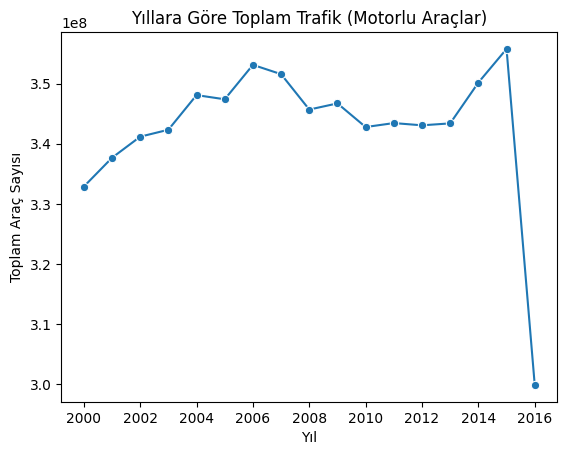

In [8]:
trafik_yil = df.groupby("AADFYear")["AllMotorVehicles"].sum().reset_index()
sns.lineplot(data=trafik_yil, x="AADFYear", y="AllMotorVehicles", marker='o')
plt.title("Yıllara Göre Toplam Trafik (Motorlu Araçlar)")
plt.xlabel("Yıl")
plt.ylabel("Toplam Araç Sayısı")
plt.show()

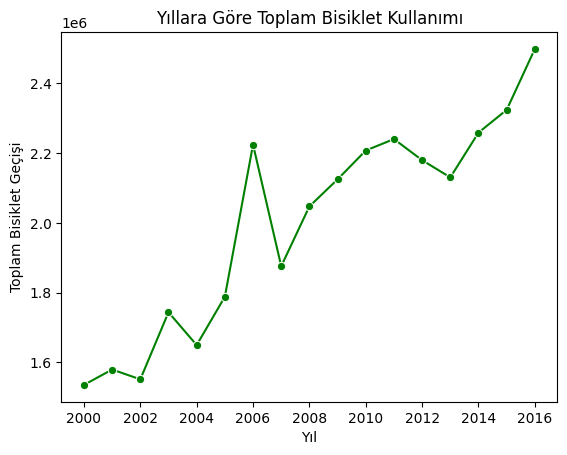

In [9]:
bisiklet_yil = df.groupby("AADFYear")["PedalCycles"].sum().reset_index()
sns.lineplot(data=bisiklet_yil, x="AADFYear", y="PedalCycles", marker='o', color='green')
plt.title("Yıllara Göre Toplam Bisiklet Kullanımı")
plt.xlabel("Yıl")
plt.ylabel("Toplam Bisiklet Geçişi")
plt.show()

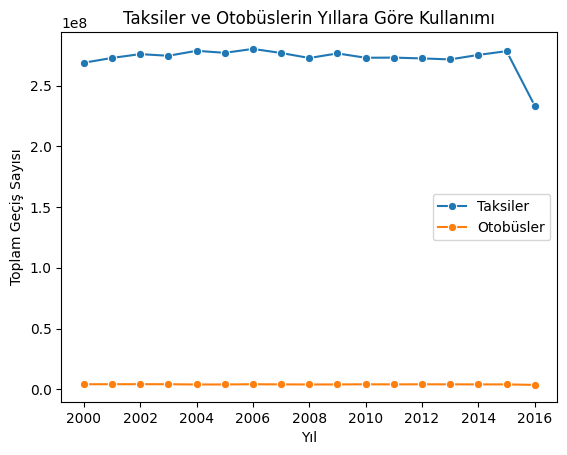

In [10]:
tasitlar_yil = df.groupby("AADFYear")[["CarsTaxis", "BusesCoaches"]].sum().reset_index()
sns.lineplot(data=tasitlar_yil, x="AADFYear", y="CarsTaxis", label="Taksiler", marker='o')
sns.lineplot(data=tasitlar_yil, x="AADFYear", y="BusesCoaches", label="Otobüsler", marker='o')
plt.title("Taksiler ve Otobüslerin Yıllara Göre Kullanımı")
plt.xlabel("Yıl")
plt.ylabel("Toplam Geçiş Sayısı")
plt.legend()
plt.show()

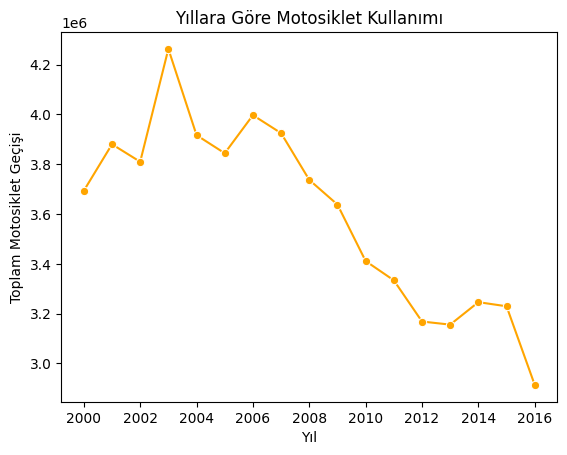

In [11]:
moto_yil = df.groupby("AADFYear")["Motorcycles"].sum().reset_index()
sns.lineplot(data=moto_yil, x="AADFYear", y="Motorcycles", marker='o', color='orange')
plt.title("Yıllara Göre Motosiklet Kullanımı")
plt.xlabel("Yıl")
plt.ylabel("Toplam Motosiklet Geçişi")
plt.show()

In [12]:
en_yogun_yil = trafik_yil.loc[trafik_yil['AllMotorVehicles'].idxmax()]
print(f"\n🚗 En yoğun yıl: {en_yogun_yil['AADFYear']} ({int(en_yogun_yil['AllMotorVehicles']):,} araç)")



🚗 En yoğun yıl: 2015 (355,772,756 araç)


In [13]:
en_az_yil = trafik_yil.loc[trafik_yil['AllMotorVehicles'].idxmin()]
print(f"🚦 En az yoğun yıl: {en_az_yil['AADFYear']} ({int(en_az_yil['AllMotorVehicles']):,} araç)")


🚦 En az yoğun yıl: 2016 (299,886,933 araç)


In [14]:
df[["AllMotorVehicles", "CP"]].corr()


,AllMotorVehicles,CP
AllMotorVehicles,1.000000,0.003606
CP,0.003606,1.000000


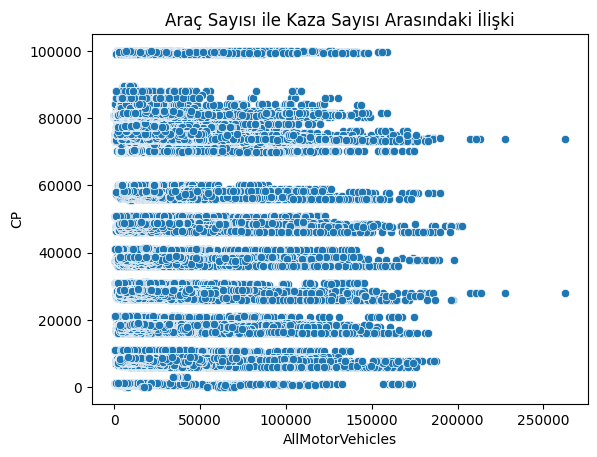

In [15]:
sns.scatterplot(data=df, x="AllMotorVehicles", y="CP")
plt.title("Araç Sayısı ile Kaza Sayısı Arasındaki İlişki")
plt.show()


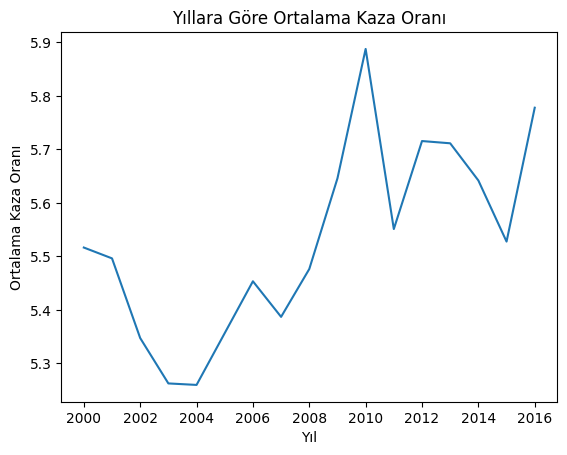

In [16]:
df["KazaOrani"] = df["CP"] / df["AllMotorVehicles"]
oran_yil = df.groupby("AADFYear")["KazaOrani"].mean().reset_index()

sns.lineplot(data=oran_yil, x="AADFYear", y="KazaOrani")
plt.title("Yıllara Göre Ortalama Kaza Oranı")
plt.ylabel("Ortalama Kaza Oranı")
plt.xlabel("Yıl")
plt.show()


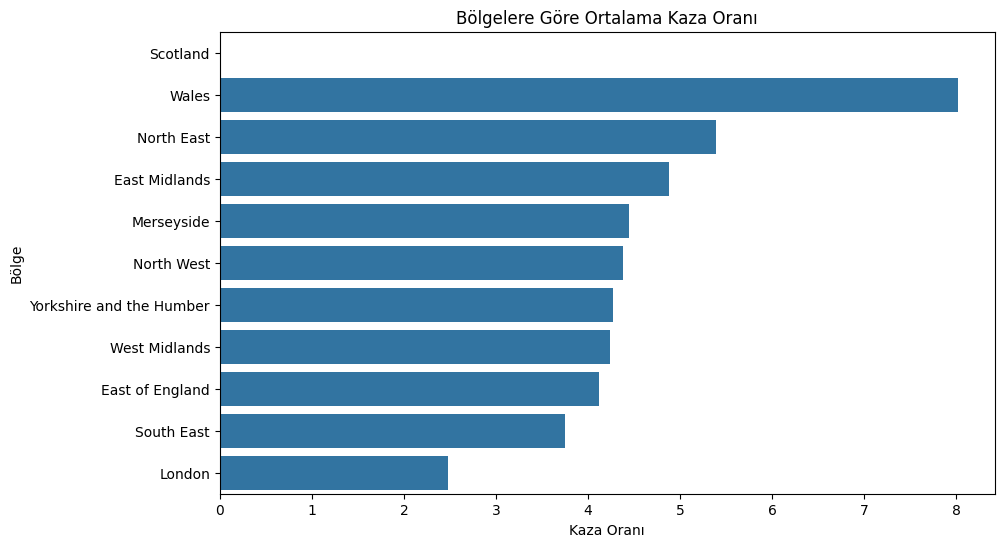

In [17]:
df["KazaOrani"] = df["CP"] / df["AllMotorVehicles"]
oran_region = df.groupby("Region")["KazaOrani"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=oran_region.values, y=oran_region.index)
plt.title("Bölgelere Göre Ortalama Kaza Oranı")
plt.xlabel("Kaza Oranı")
plt.ylabel("Bölge")
plt.show()


In [18]:
df = df[df["AADFYear"] < 2016]


In [19]:
df["Estimation_method"].fillna("Unknown", inplace=True)
df["Estimation_method_detailed"].fillna("Unknown", inplace=True)


/tmp/ipython-input-19-2313748202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Estimation_method"].fillna("Unknown", inplace=True)
/tmp/ipython-input-19-2313748202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T